In [18]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [2]:
broke_df = pd.read_csv('../datasets/gearbox_fault/b30hz50.csv')
healthy_df = pd.read_csv('../datasets/gearbox_fault/h30hz50.csv', nrows=94208)

In [3]:
broke_df['condition'] = 'Broken'
healthy_df['condition'] = 'Healthy'


In [4]:
combined_df = pd.concat([broke_df, healthy_df], ignore_index=True)

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188416 entries, 0 to 188415
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   a1         188416 non-null  float64
 1   a2         188416 non-null  float64
 2   a3         188416 non-null  float64
 3   a4         188416 non-null  float64
 4   condition  188416 non-null  object 
dtypes: float64(4), object(1)
memory usage: 7.2+ MB


In [6]:
category_counts = combined_df['condition'].value_counts()

In [7]:
category_counts

condition
Broken     94208
Healthy    94208
Name: count, dtype: int64

In [8]:
le = LabelEncoder()
combined_df['encoded_condition'] = le.fit_transform(combined_df['condition'])

In [9]:
combined_df['encoded_condition']

0         0
1         0
2         0
3         0
4         0
         ..
188411    1
188412    1
188413    1
188414    1
188415    1
Name: encoded_condition, Length: 188416, dtype: int32

In [10]:
print("Classes:", le.classes_)
print("Encoded values:", le.transform(le.classes_))

Classes: ['Broken' 'Healthy']
Encoded values: [0 1]


In [11]:
# 1. Z-Score Method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[z_scores > threshold]

# 2. IQR Method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]



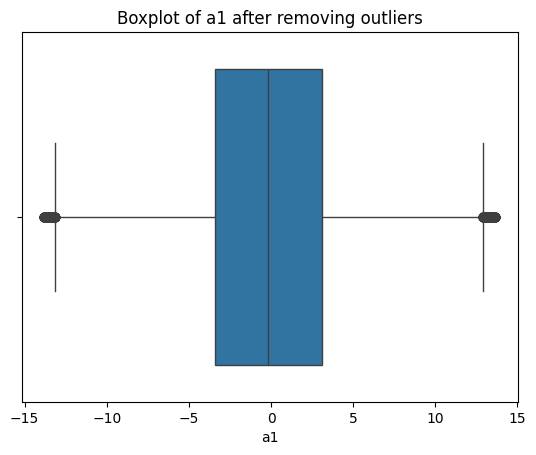

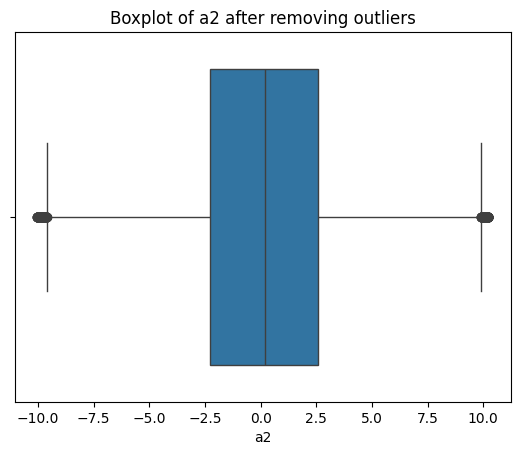

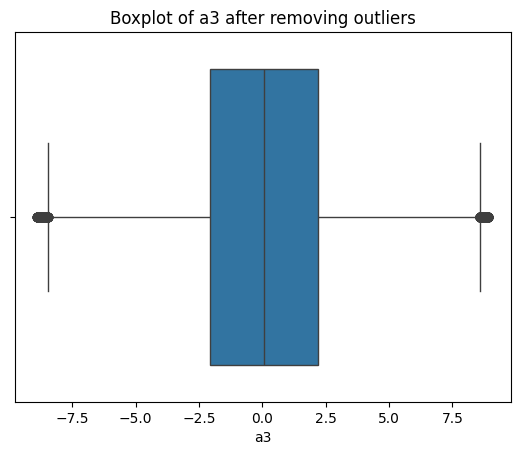

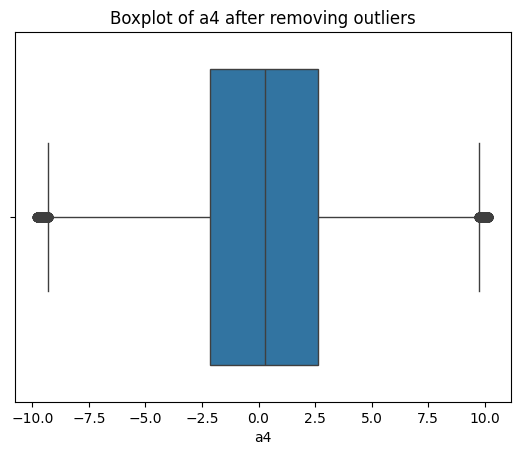

In [12]:
columns = ['a1', 'a2', 'a3', 'a4']
# Apply the methods
df_cleaned = combined_df.copy()

# Loop through each column in the list and remove outliers
for column in columns:
    # Apply the Z-Score and IQR methods
    outliers_zscore = detect_outliers_zscore(df_cleaned[column])
    outliers_iqr = detect_outliers_iqr(df_cleaned[column])
    
    # Combine the outliers from both methods
    outliers_combined = pd.concat([outliers_zscore, outliers_iqr]).drop_duplicates()
    
    # Remove the rows with outliers from the dataset
    df_cleaned = df_cleaned[~df_cleaned[column].isin(outliers_combined)]
    
    # Visualize each column after removing outliers
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot of {column} after removing outliers")
    plt.show()


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163847 entries, 1 to 188415
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   a1                 163847 non-null  float64
 1   a2                 163847 non-null  float64
 2   a3                 163847 non-null  float64
 3   a4                 163847 non-null  float64
 4   condition          163847 non-null  object 
 5   encoded_condition  163847 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 8.1+ MB


In [14]:
counts = df_cleaned['condition'].value_counts()

In [15]:
counts

condition
Broken     84922
Healthy    78925
Name: count, dtype: int64

In [16]:
# df_cleaned.to_csv('../datasets/gearbox_fault/gearbox_fault_data.csv')

In [22]:
scaler = StandardScaler()
df_cleaned[['a1', 'a2', 'a3', 'a4']] = scaler.fit_transform(df_cleaned[['a1', 'a2', 'a3', 'a4']])

In [23]:
df_cleaned.to_csv('../datasets/gearbox_fault/gearbox_fault_data.csv')